<a href="https://colab.research.google.com/github/shafiqulrehman/AlzheimerCode/blob/main/DARWIN_Repeated_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Repeated Cross Validation technique on all the classifiers considered in this study**

Random Forest Classifier

Average Accuracy: 0.86 ± 0.08
Average Specificity: 0.89 ± 0.00
Average Sensitivity (Recall): 0.90 ± 0.10
Average Precision: 0.84 ± 0.10
Average TPR (True Positive Rate): 0.67 ± 0.47
Average FPR (False Positive Rate): 0.37 ± 0.45
Average Cohen's Kappa: 0.71 ± 0.15
Average F1 Score: 0.86 ± 0.07
Average MCC (Matthews Correlation Coefficient): 0.72 ± 0.15
Average ROC AUC: 0.85 ± 0.08


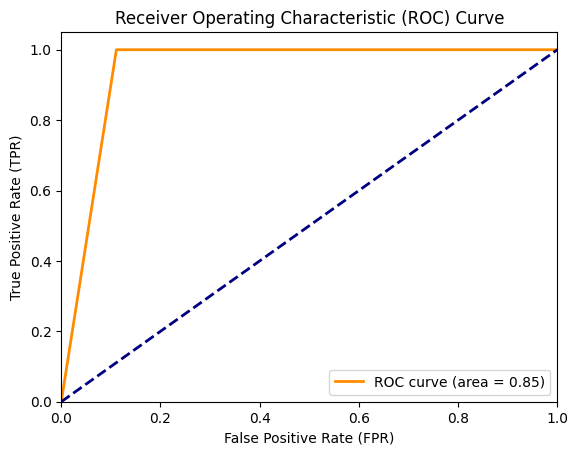

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Logistic Regression Classifier

Average Accuracy: 0.83 ± 0.08
Average Specificity: 0.89 ± 0.00
Average Sensitivity (Recall): 0.81 ± 0.13
Average Precision: 0.86 ± 0.10
Average TPR (True Positive Rate): 0.67 ± 0.47
Average FPR (False Positive Rate): 0.37 ± 0.45
Average Cohen's Kappa: 0.66 ± 0.17
Average F1 Score: 0.83 ± 0.09
Average MCC (Matthews Correlation Coefficient): 0.67 ± 0.17
Average ROC AUC: 0.83 ± 0.08


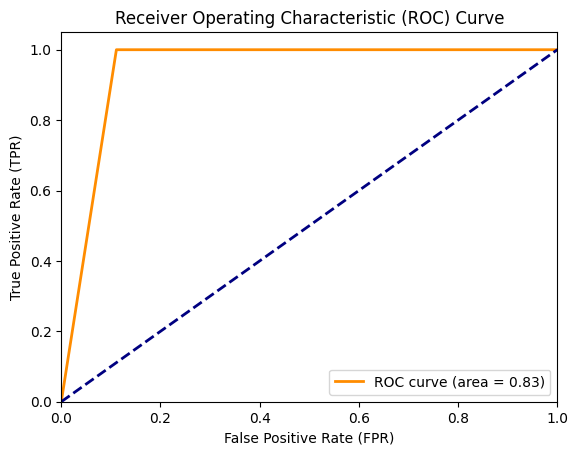

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)  # Create a Logistic Regression classifier

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    logistic_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = logistic_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Linear Discreminant Analysis classifier

Average Accuracy: 0.70 ± 0.12
Average Specificity: 0.89 ± 0.00
Average Sensitivity (Recall): 0.66 ± 0.17
Average Precision: 0.73 ± 0.13
Average TPR (True Positive Rate): 0.62 ± 0.44
Average FPR (False Positive Rate): 0.37 ± 0.45
Average Cohen's Kappa: 0.39 ± 0.23
Average F1 Score: 0.68 ± 0.14
Average MCC (Matthews Correlation Coefficient): 0.41 ± 0.23
Average ROC AUC: 0.70 ± 0.12


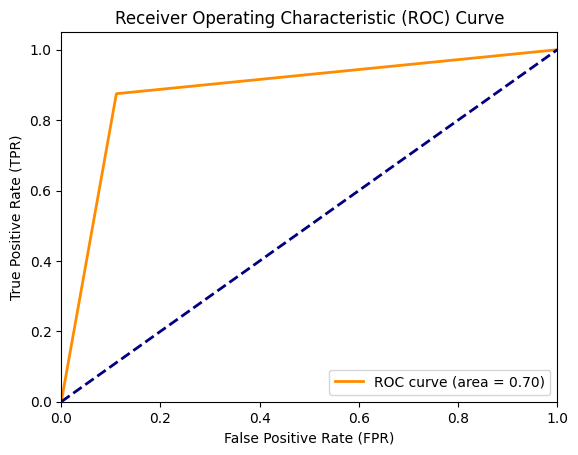

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import LinearDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the Linear Discriminant Analysis (LDA) Classifier
lda_classifier = LinearDiscriminantAnalysis()  # Create an LDA classifier

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    lda_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lda_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Gausian Naive Bayes classifier

Average Accuracy: 0.84 ± 0.08
Average Specificity: 0.78 ± 0.00
Average Sensitivity (Recall): 0.88 ± 0.10
Average Precision: 0.82 ± 0.10
Average TPR (True Positive Rate): 0.67 ± 0.47
Average FPR (False Positive Rate): 0.41 ± 0.43
Average Cohen's Kappa: 0.67 ± 0.17
Average F1 Score: 0.85 ± 0.08
Average MCC (Matthews Correlation Coefficient): 0.68 ± 0.17
Average ROC AUC: 0.83 ± 0.09


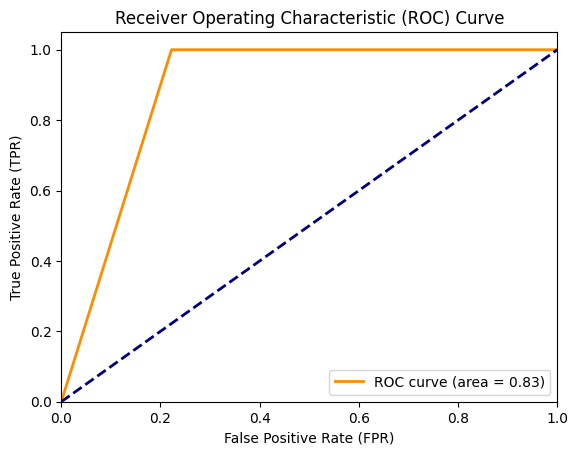

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the Gaussian Naive Bayes (GNB) Classifier
gnb_classifier = GaussianNB()  # Create a GNB classifier

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    gnb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = gnb_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Extra Tree Classiifer

Average Accuracy: 0.86 ± 0.07
Average Specificity: 0.78 ± 0.00
Average Sensitivity (Recall): 0.89 ± 0.09
Average Precision: 0.86 ± 0.10
Average TPR (True Positive Rate): 0.62 ± 0.44
Average FPR (False Positive Rate): 0.41 ± 0.43
Average Cohen's Kappa: 0.72 ± 0.15
Average F1 Score: 0.87 ± 0.07
Average MCC (Matthews Correlation Coefficient): 0.73 ± 0.14
Average ROC AUC: 0.86 ± 0.07


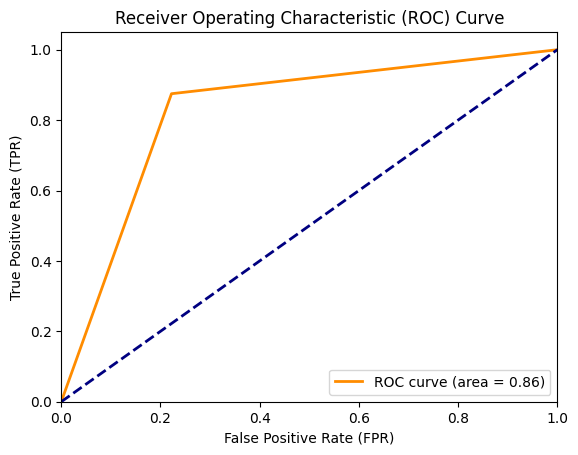

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier  # Import ExtraTreesClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)  # Create an Extra Trees classifier

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    et_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = et_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


XGB classifier

Average Accuracy: 0.85 ± 0.08
Average Specificity: 0.89 ± 0.00
Average Sensitivity (Recall): 0.87 ± 0.11
Average Precision: 0.86 ± 0.10
Average TPR (True Positive Rate): 0.62 ± 0.44
Average FPR (False Positive Rate): 0.37 ± 0.45
Average Cohen's Kappa: 0.71 ± 0.15
Average F1 Score: 0.86 ± 0.08
Average MCC (Matthews Correlation Coefficient): 0.72 ± 0.15
Average ROC AUC: 0.85 ± 0.08


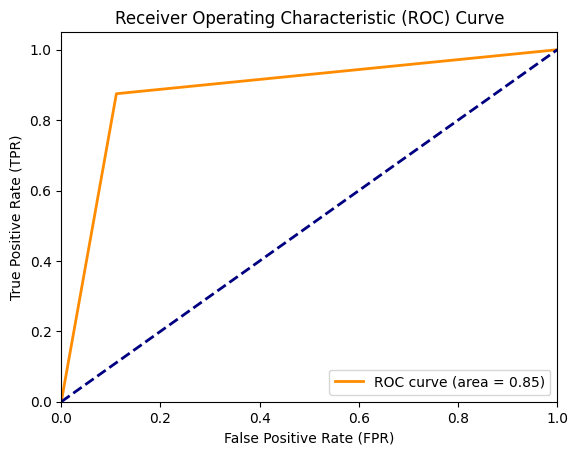

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)  # Create an XGBoost classifier

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


KNN classifiers

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Average Accuracy: 0.62 ± 0.08
Average Specificity: 1.00 ± 0.00
Average Sensitivity (Recall): 0.26 ± 0.15
Average Precision: 0.92 ± 0.28
Average TPR (True Positive Rate): 0.46 ± 0.41
Average FPR (False Positive Rate): 0.33 ± 0.47
Average Cohen's Kappa: 0.25 ± 0.15
Average F1 Score: 0.39 ± 0.19
Average MCC (Matthews Correlation Coefficient): 0.36 ± 0.15
Average ROC AUC: 0.63 ± 0.07


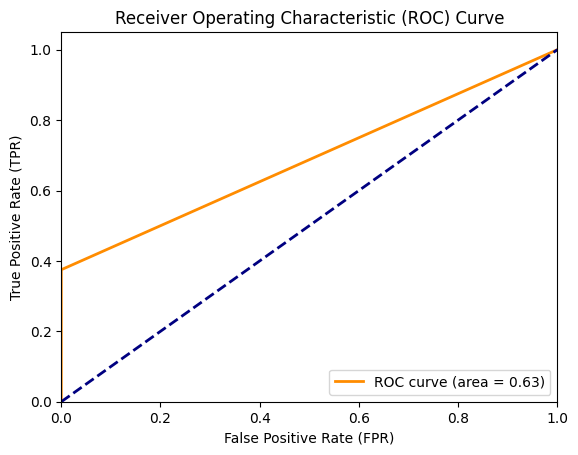

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Create a KNN classifier with 5 neighbors (you can adjust this)

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Support Vector Machine classifier

Average Accuracy: 0.82 ± 0.09
Average Specificity: 0.89 ± 0.00
Average Sensitivity (Recall): 0.79 ± 0.13
Average Precision: 0.87 ± 0.10
Average TPR (True Positive Rate): 0.62 ± 0.44
Average FPR (False Positive Rate): 0.37 ± 0.45
Average Cohen's Kappa: 0.65 ± 0.17
Average F1 Score: 0.82 ± 0.10
Average MCC (Matthews Correlation Coefficient): 0.66 ± 0.17
Average ROC AUC: 0.83 ± 0.09


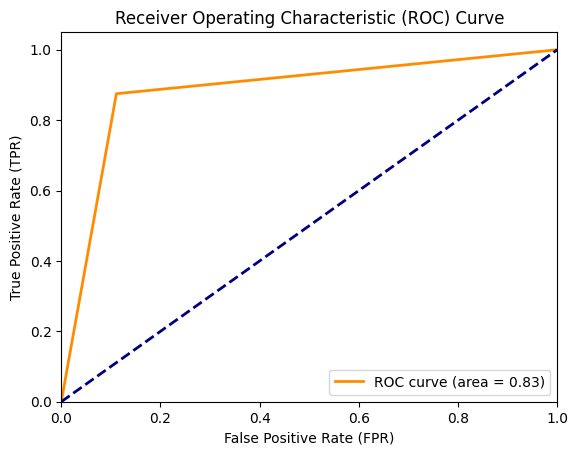

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  # Import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Create an SVM classifier with a linear kernel (you can change the kernel as needed)

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Multi Layer Perceptron classifier

Average Accuracy: 0.84 ± 0.08
Average Specificity: 0.89 ± 0.00
Average Sensitivity (Recall): 0.84 ± 0.12
Average Precision: 0.85 ± 0.10
Average TPR (True Positive Rate): 0.67 ± 0.47
Average FPR (False Positive Rate): 0.37 ± 0.45
Average Cohen's Kappa: 0.67 ± 0.16
Average F1 Score: 0.84 ± 0.09
Average MCC (Matthews Correlation Coefficient): 0.68 ± 0.16
Average ROC AUC: 0.84 ± 0.08


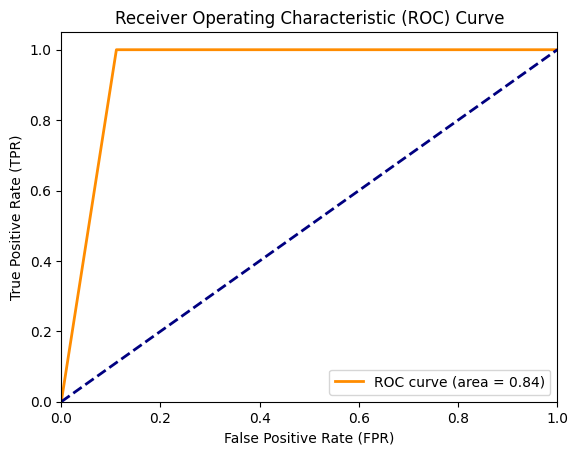

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the MLP (Multi-Layer Perceptron) Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)  # Create an MLP classifier with two hidden layers (adjust as needed)

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    mlp_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = mlp_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Decision Tree Classifier

Average Accuracy: 0.74 ± 0.09
Average Specificity: 0.67 ± 0.00
Average Sensitivity (Recall): 0.73 ± 0.14
Average Precision: 0.76 ± 0.12
Average TPR (True Positive Rate): 0.62 ± 0.44
Average FPR (False Positive Rate): 0.44 ± 0.42
Average Cohen's Kappa: 0.48 ± 0.19
Average F1 Score: 0.74 ± 0.10
Average MCC (Matthews Correlation Coefficient): 0.49 ± 0.19
Average ROC AUC: 0.74 ± 0.09


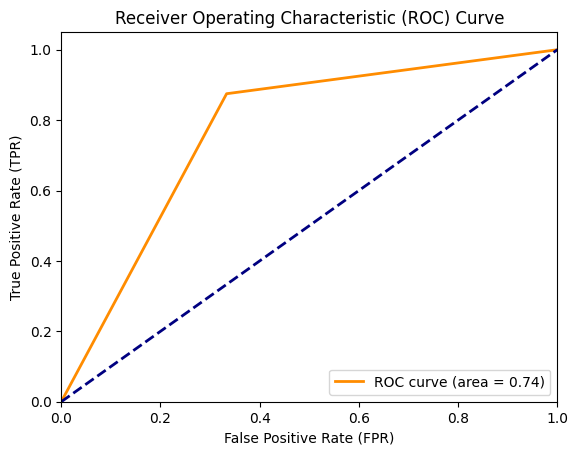

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/content/data_null_outlier_free_normalized_corr_90.csv'
data = pd.read_csv(csv_file)

# Extract the last column as the target class label
y = data.iloc[:, -1]

# Drop the last column to obtain the features
X = data.iloc[:, :-1]

# Map labels 'P' and 'H' to binary values (1 and 0)
y = y.map({'P': 1, 'H': 0})

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # Create a Decision Tree classifier

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cohen_kappa_scores = []
mcc_scores = []

# Repeated Cross-Validation
n_splits = 10  # Number of splits
n_repeats = 25  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = dt_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    cohen_kappa_scores.append(kappa)
    mcc_scores.append(mcc)

# Calculate average performance metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_specificity = np.mean(specificity)
avg_tpr = np.mean(tpr)
avg_fpr = np.mean(fpr)
avg_roc_auc = np.mean(roc_auc_scores)
avg_cohen_kappa = np.mean(cohen_kappa_scores)
avg_mcc = np.mean(mcc_scores)

# Calculate standard deviations for stability assessment
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)
std_specificity = np.std(specificity)
std_tpr = np.std(tpr)
std_fpr = np.std(fpr)
std_roc_auc = np.std(roc_auc_scores)
std_cohen_kappa = np.std(cohen_kappa_scores)
std_mcc = np.std(mcc_scores)

# Print the results
print(f"Average Accuracy: {avg_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Specificity: {avg_specificity:.2f} ± {std_specificity:.2f}")
print(f"Average Sensitivity (Recall): {avg_recall:.2f} ± {std_recall:.2f}")
print(f"Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
print(f"Average TPR (True Positive Rate): {avg_tpr:.2f} ± {std_tpr:.2f}")
print(f"Average FPR (False Positive Rate): {avg_fpr:.2f} ± {std_fpr:.2f}")
print(f"Average Cohen's Kappa: {avg_cohen_kappa:.2f} ± {std_cohen_kappa:.2f}")
print(f"Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
print(f"Average MCC (Matthews Correlation Coefficient): {avg_mcc:.2f} ± {std_mcc:.2f}")
print(f"Average ROC AUC: {avg_roc_auc:.2f} ± {std_roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(avg_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
